<a href="https://colab.research.google.com/github/bro-kite/S_and_P_500/blob/master/S%26P_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import the libraries


In [42]:
!pip install ppscore

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ppscore as pps
import seaborn as sns

##Import the dataset

In [44]:
dataset = pd.read_csv('US_Data.csv')
dataset.head()
dataset.drop(dataset.index[588:593], inplace=True)
dataset.tail(10)

,DATE,FedInterestRate,Inflation,GDP,S&P500Close,UmemploymentRate,GovernmentDebtGDP,CorporateDebt,PoundDollar,DollarYen,SP5006monthslater
578,01/03/2019,2.41,1.9,21098.83,2834.40,3.8,1.04403,6437929,1.317,111.1443,2926.46
579,01/04/2019,2.42,2.0,21340.27,2945.83,3.6,1.04403,6513808,1.303,111.6414,2976.74
580,01/05/2019,2.39,1.8,21340.27,2752.06,3.6,1.03201,6513808,1.286,109.9714,3037.56
581,01/06/2019,2.38,1.6,21340.27,2941.76,3.7,1.03201,6513808,1.268,108.0685,3140.98
582,01/07/2019,2.40,1.8,21542.54,2980.38,3.7,1.03201,6588777,1.246,108.2864,3230.78
583,01/08/2019,2.13,1.7,21542.54,2926.46,3.7,1.05463,6588777,1.216,106.1886,3225.52
584,01/09/2019,2.04,1.7,21542.54,2976.74,3.5,1.05463,6588777,1.237,107.5400,2954.22
585,01/10/2019,1.83,1.8,21729.12,3037.56,3.6,1.05463,6557578,1.266,108.1368,2584.59
586,01/11/2019,1.55,2.1,21729.12,3140.98,3.5,1.06776,6557578,1.288,108.8579,2912.43
587,01/12/2019,1.55,2.3,21729.12,3230.78,3.5,1.06776,6557578,1.311,109.1010,3044.31


###Exploratory Data Analysis

**Calculating the Predictive Power Score (PPS)**

In [45]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=1, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

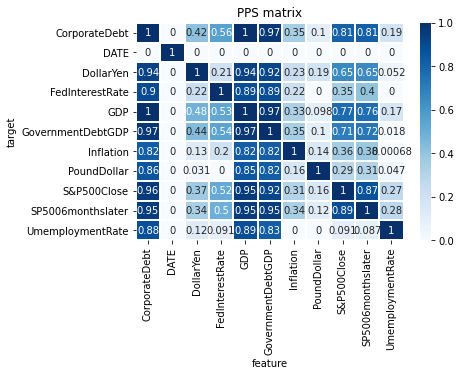

In [46]:
matrix = pps.matrix(dataset)
heatmap(matrix)

**Correlation Matrix**

In [47]:
def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    return ax

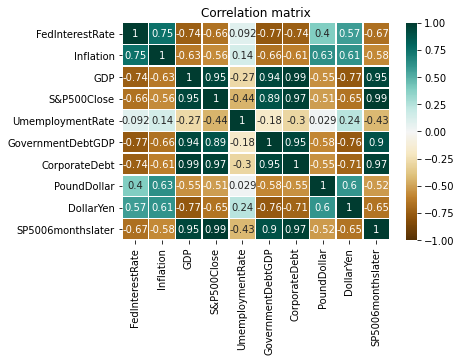

In [48]:
corr_heatmap(dataset.corr())

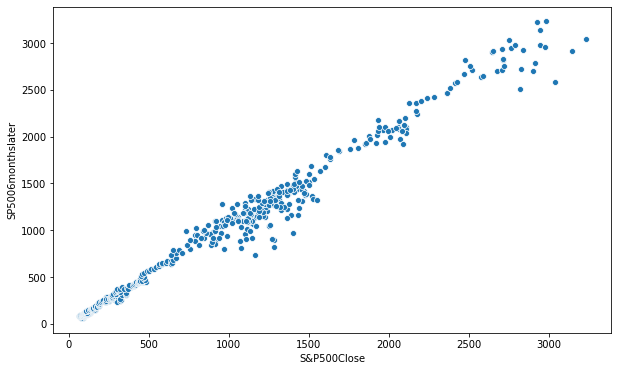

In [49]:
fig = plt.gcf()
fig.set_size_inches(10,6)
scatter = sns.scatterplot('S&P500Close', 'SP5006monthslater', data= dataset)

In [50]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

##Splitting the Dataset

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#Training the Decision Tree Model

In [52]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state= 1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

##Predict Results

In [53]:
#latest_data = (Fed interest rate, Inflation, GDP, S&P500 close, Unemployment rate,
# Government debt to GDP ratio, Total coporate debt, GBP/Dollar, Dollar/Yen)
latest_data = 0.25, 0.1, 21200, 3049.63, 13.30, 1.0690, 6781622, 1.24184, 107.19 
y_pred = regressor.predict([[0.25, 0.1, 21200, 3049.63, 13.30, 1.0690, 6781622, 1.24184, 107.19]])
print(y_pred)

[1920.03]


In [54]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1805.81 1681.55]
 [2648.05 2705.27]
 [ 111.68  104.95]
 [2823.81 2519.36]
 [ 102.91   96.11]
 [ 130.92  131.21]
 [  95.58   98.7 ]
 [ 179.83  189.82]
 [ 277.72  271.91]
 [1920.03 1972.18]
 [ 182.08  202.17]
 [1430.83 1473.99]
 [ 954.31  899.47]
 [  94.7    93.15]
 [  87.3    91.15]
 [1397.91 1310.33]
 [1207.01 1234.18]
 [ 126.35  121.89]
 [1454.6  1452.43]
 [ 284.2   274.08]
 [2506.85 2704.1 ]
 [1363.61 1325.83]
 [ 284.2   291.7 ]
 [ 182.08  180.66]
 [ 102.03  107.46]
 [1057.08 1036.19]
 [ 345.99  367.07]
 [1412.16 1320.64]
 [ 414.03  431.35]
 [ 107.14  107.39]
 [ 412.7   408.78]
 [1526.75 1468.36]
 [ 451.67  440.19]
 [  99.93   96.28]
 [1049.34  916.92]
 [ 443.38  458.26]
 [ 105.24  102.1 ]
 [1249.48 1248.29]
 [  83.87   88.75]
 [ 101.64  100.18]
 [ 235.52  247.35]
 [ 459.27  470.42]
 [  63.54   69.97]
 [ 790.82  786.16]
 [1385.59 1377.94]
 [ 114.16  111.24]
 [2043.94 1940.24]
 [ 387.86  395.43]
 [2198.81 2168.27]
 [ 122.38  125.46]
 [ 670.63  757.02]
 [ 153.18  166.1 ]
 [ 111.88  1

##Evaluating Model Performance

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9877272493904273